##**Customer Segmentation Using K-Means Clustering**


Customer segmentation is a key marketing strategy used to divide customers into groups based on similar characteristics.

In this project, we perform customer segmentation using the Mall Customers dataset. The goal is to identify distinct customer groups based on Annual Income and Spending Score using K-Means clustering, an unsupervised machine learning algorithm.

The insights from this segmentation can help businesses design targeted marketing strategies and improve customer retention.

The Mall Customers dataset contains basic demographic and behavioral information of customers visiting a shopping mall.

Features include:

*   CustomerID: Unique identifier for each customer

*   Gender: Gender of the customer

*   Age: Age of the customer

*   Annual Income: Annual income in thousand dollars

*   Spending Score: Score assigned based on customer purchasing behavior

The main objectives of this project are:

*   To explore customer purchasing behavior

*   To identify meaningful customer segments

*   To apply K-Means clustering for segmentation

*   To visualize the customer clusters

*   To interpret clusters and derive business insights

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers[1].csv to Mall_Customers[1].csv


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline
sns.set(style="whitegrid")

In this step, the dataset is loaded into the notebook and basic exploratory data analysis (EDA) is performed.

This includes checking the structure of the dataset, summary statistics, and understanding the distribution of key variables.

In [4]:
df = pd.read_csv("Mall_Customers[1].csv")
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual_Income,0
Spending_Score,0


Exploratory Data Analysis (EDA) helps in understanding the underlying patterns within the data.

We visualize the relationships between Annual Income and Spending Score to gain intuition about possible customer groups before applying any machine learning algorithms.

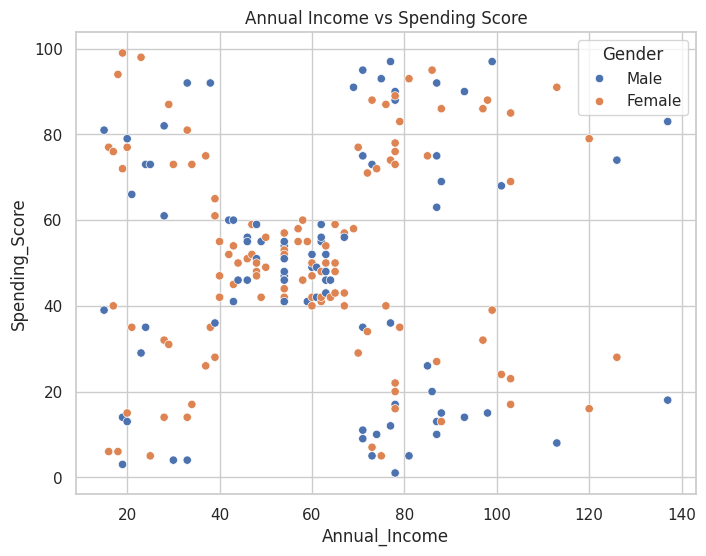

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Annual_Income',
    y='Spending_Score',
    hue='Gender'
)
plt.title("Annual Income vs Spending Score")
plt.show()

For clustering, we select Annual Income and Spending Score as the primary features.

These variables directly reflect a customer’s earning capacity and spending behavior, making them highly relevant for customer segmentation.

In [8]:
X = df[['Annual_Income', 'Spending_Score']]
X.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


K-Means clustering is a distance-based algorithm, which means the scale of features can strongly affect the results.

Therefore, we apply Standardization to ensure that all features contribute equally to the clustering process.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Before applying K-Means, we determine the optimal number of clusters.

The Elbow Method is used to analyze how the within-cluster sum of squares (WCSS) changes with different numbers of clusters.

The point where the decrease in WCSS slows down significantly is chosen as the optimal number of clusters.

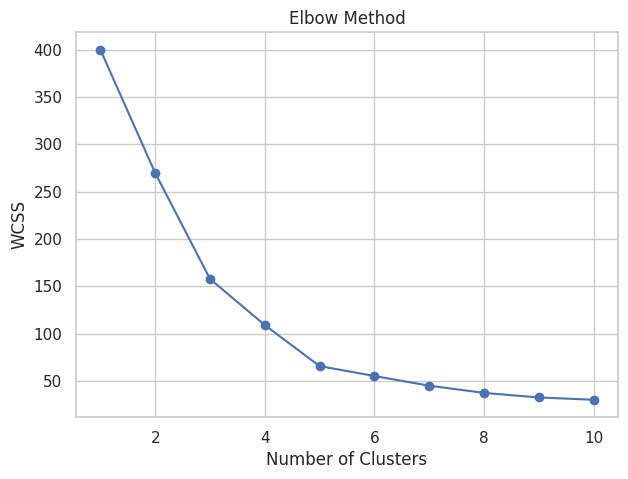

In [10]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [11]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Clusters: {i}, Silhouette Score: {score:.3f}")

Clusters: 2, Silhouette Score: 0.321
Clusters: 3, Silhouette Score: 0.467
Clusters: 4, Silhouette Score: 0.494
Clusters: 5, Silhouette Score: 0.555
Clusters: 6, Silhouette Score: 0.540
Clusters: 7, Silhouette Score: 0.528


Using the optimal number of clusters identified in the previous step, the K-Means algorithm is applied to the scaled data.

Each customer is assigned to a cluster based on their similarity to other customers.

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=25)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Model Building: K-Means Clustering

The resulting clusters are visualized using a scatter plot of Annual Income versus Spending Score.

Different colors represent different customer segments, allowing us to clearly observe how customers are grouped.

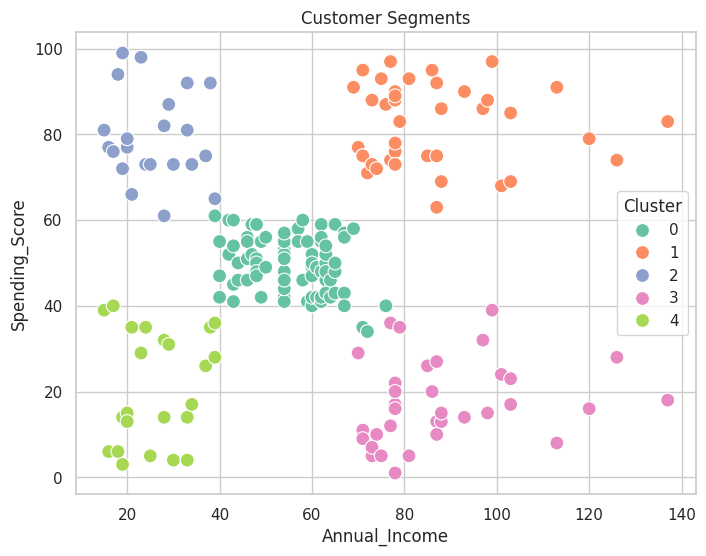

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Annual_Income',
    y='Spending_Score',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title("Customer Segments")
plt.show()

K-Means clustering was chosen due to its simplicity, scalability, and effectiveness in grouping customers based on distance-based similarity.

In [14]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(
    centers,
    columns=['Annual_Income', 'Spending_Score']
)
centers_df

,Annual_Income,Spending_Score
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


To understand the characteristics of each cluster, we calculate the average income and spending score for each group.

This helps in interpreting the clusters and assigning meaningful labels such as Premium Customers, Budget Customers, or Potential Customers.

In [15]:
df.groupby('Cluster')[['Annual_Income', 'Spending_Score', 'Age']].mean()

,Annual_Income,Spending_Score,Age
Cluster,,,
0,55.296296,49.518519,42.716049
1,86.538462,82.128205,32.692308
2,25.727273,79.363636,25.272727
3,88.200000,17.114286,41.114286
4,26.304348,20.913043,45.217391


In [16]:
df['Cluster'].value_counts()

,count
Cluster,
0,81
1,39
3,35
4,23
2,22


Using K-Means clustering, customers were segmented based on Annual Income, Spending Score, and Age. Each cluster represents a distinct customer group with unique purchasing behavior. These insights can help businesses design targeted marketing strategies, improve customer retention, and optimize profitability.

#Business Insights & Recommendations

Based on the customer segments identified, we can propose targeted marketing strategies:

*   High-income, high-spending customers can be rewarded with loyalty programs

*   High-income, low-spending customers can be targeted with personalized offers

*   Low-income, high-spending customers may respond well to discounts

*   Low-income, low-spending customers require cost-effective marketing approaches

*   These insights can help businesses improve customer engagement and revenue.

#Conclusion

In this project, customer segmentation was successfully performed using K-Means clustering on the Mall Customers dataset. By analyzing key attributes such as Annual Income, Spending Score, and Age, customers were grouped into distinct clusters representing different purchasing behaviors.

The analysis identified high-value customers with strong spending capacity, price-sensitive young shoppers, conservative high-income individuals, and low-value customer segments. These insights demonstrate how unsupervised machine learning can uncover hidden patterns in customer data and support data-driven business decisions.

*   Customer segmentation enables businesses to:

*   Design targeted marketing strategies

*   Improve customer retention

*   Optimize resource allocation

*   Increase overall profitability

This project serves as a strong foundation for advanced customer analytics, and it can be further extended using RFM analysis, CLV modeling, or real-world transactional data to build more robust segmentation systems.